# 《零基础机器学习》--U6 练习使用卷积神经网络进行狗狗识别



In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os 
from pathlib import Path

# 获取家目录
home = Path.home()

dir = home/"Downloads/stanford dogs/images/Images/"
# print(os.listdir(dir))
labels_to_consider = []

i = 0
for file in os.listdir(dir):
    i = i+1 
    if i <= 10:
     labels_to_consider.append(file)
    else:
         break
# print(labels_to_consider)



In [21]:
# Install OpenCV if not already installed
%pip install opencv-python

import cv2

X = []
y_label = []

imgSize = 150

"""读取训练的图片数据"""
def training_data(label, data_dir):
    print("dir:"+data_dir)
    data = []
    labels = []
    for file in os.listdir(data_dir):
        if file.endswith('.jpg'):
            img_path = os.path.join(data_dir, file)
            # img = plt.imread(img_path)
            # img_resized = np.resize(img, (64, 64, 3))  # Resize to 64x64 for simplicity
            # data.append(img_resized)
            img = cv2.imread(img_path,cv2.IMREAD_COLOR)
            img = cv2.resize(img,(imgSize,imgSize))
            X.append(np.array(img))
            labels.append(label)
    return np.array(data), np.array(labels)

# labels_to_consider = ['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog']

for label in labels_to_consider:
    dataDir = str(dir.absolute())+"/"+label+"/"
    data, labels = training_data(label, dataDir)
    X.extend(data)
    y_label.extend(labels)

print(len(X))
# print(y_label)



[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
dir:/Users/jasonye/Downloads/stanford dogs/images/Images/n02097658-silky_terrier/
dir:/Users/jasonye/Downloads/stanford dogs/images/Images/n02092002-Scottish_deerhound/
dir:/Users/jasonye/Downloads/stanford dogs/images/Images/n02099849-Chesapeake_Bay_retriever/
dir:/Users/jasonye/Downloads/stanford dogs/images/Images/n02091244-Ibizan_hound/
dir:/Users/jasonye/Downloads/stanford dogs/images/Images/n02095314-wire-haired_fox_terrier/
dir:/Users/jasonye/Downloads/stanford dogs/images/Images/n02091831-Saluki/
dir:/Users/jasonye/Downloads/stanford dogs/images/Images/n02102318-cocker_spaniel/
dir:/Users/jasonye/Downloads/stanford dogs/images/Images/n02104365-schipperke/
dir:/Users/jasonye/Downloads/stanford dogs/images/Images/n02090622-borzoi/
dir:/Users/jasonye/Downloads/stanford dogs/images/Images/n02113023-Pembroke/
1

In [22]:
# 准备测试数据

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y = le.fit_transform(y_label) # 标签编码

y = to_categorical(y, num_classes=len(labels_to_consider)) # 转化为one-hot编码
print(y[1000:1020])
X = np.array(X)
X = X / 255.0  # 归一化

print("X shape:", X.shape)
print("X    dtype:", X[:10])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
X shape: (1772, 150, 150, 3)
X    dtype: [[[[0.88627451 0.85098039 0.83529412]
   [0.89019608 0.85490196 0.83921569]
   [0.89411765 0.85882353 0.84313725]
   ...
   [0.09019608 0.1372549  0.39215686]
   [0.0745098  0.10196078 0.29411765]
   [0.20784314 0.21960784 0.27843137]]

  [[0.88627451 0.85098039 0.83529412]
   [0.88627451 0.850980

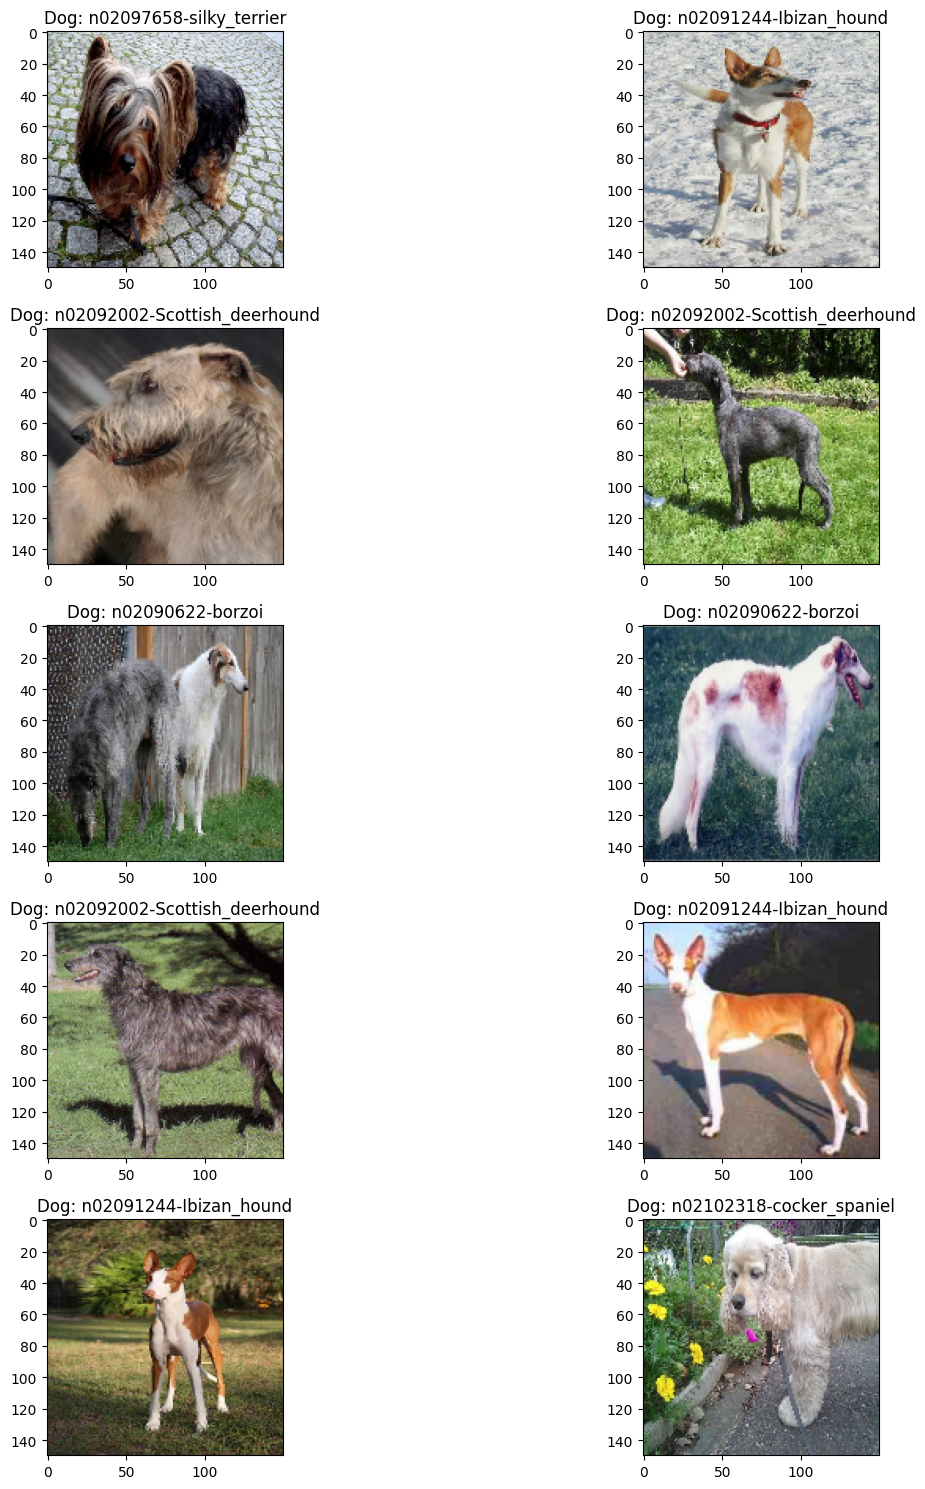

In [ ]:
import matplotlib.pyplot as plt
import random as rdm 

# fig, ax = plt.subplots(5, 2)
# fig.set_size_inches(15, 15)

# for i in range(5):
#     for j in  range(2):
#         index = rdm.randint(0, len(X))
#         X[index]=X[index][...,::-1]
#         ax[i, j].imshow(X[index])
#         ax[i, j].set_title("Dog: {}".format(y_label[index]))
#         ax[i, j].axis('off')    
# plt.tight_layout()



# 随机显示几张可爱的狗狗图片吧
def showPic():
    fig,ax = plt.subplots(5,2)
    fig.set_size_inches(15,15)
    for i in range(5):
        for j in range (2):
            r = rdm.randint(0,len(X))
            X[r] = X[r][...,::-1] #将图像通道从BGR调整为RGB，防止色彩失真
            ax[i,j].imshow(X[r])
            ax[i,j].set_title('Dog: '+y_label[r])
    plt.tight_layout()

#showPic()


In [24]:
from keras import layers
from keras import models

cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(150, 150, 3)))
cnn.add(layers.MaxPooling2D(2, 2))
cnn.add(layers.Conv2D(64, (3,3), activation="relu"))
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(layers.Conv2D(128, (3,3), activation="relu"))
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(512, activation="relu"))
cnn.add(layers.Dense(10, activation="softmax"))
cnn.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["acc"])



/Users/jasonye/python_env/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
history = cnn.fit(X_train, y_train, epochs=50, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 723ms/step - acc: 0.0995 - loss: 4.0317 - val_acc: 0.0845 - val_loss: 2.3005
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 713ms/step - acc: 0.1136 - loss: 2.3336 - val_acc: 0.0930 - val_loss: 2.2998
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 692ms/step - acc: 0.1037 - loss: 2.2893 - val_acc: 0.1493 - val_loss: 2.2891
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 690ms/step - acc: 0.1524 - loss: 2.2642 - val_acc: 0.1831 - val_loss: 2.2993
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 693ms/step - acc: 0.1849 - loss: 2.2324 - val_acc: 0.1634 - val_loss: 2.2016
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 690ms/step - acc: 0.1912 - loss: 2.1527 - val_acc: 0.1803 - val_loss: 2.2108
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 689ms/step - acc: 0.2576 - loss: 2.0787 - val_acc: 0.1944 - val_loss: 2.1383
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 696ms/step - acc: 0.2844 - loss: 2.0158 - val_acc: 0.1718 - val_loss: 2.5180
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 693ms/step - acc: 0.2406 - loss: 